# Research Question 1:Can we predict the box office success of a movie based on its genre, budget, cast, and other features. What factors are most strongly correlated with box office success, and how accurate are the predictions

# Genre and box office

In [56]:
import pandas as pd
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [57]:
df_genre = pd.read_csv('Finalmovie_dataset_fin1.csv')

In [58]:
df_genre.head(6000)

budget popularity                               production_companies  \
0             0   2.561161        [{'name': 'Walt Disney Pictures', 'id': 2}]   
1             0  12.140733  [{'name': 'Universal Pictures', 'id': 33}, {'n...   
2             0   2.228434                 [{'name': 'BBC Films', 'id': 288}]   
3             0   1.100915  [{'name': 'Ministère des Affaires Étrangères',...   
4             0   0.745542    [{'name': 'Iwerks Entertainment', 'id': 70801}]   
5             0   1.493361  [{'name': 'StudioCanal', 'id': 694}, {'name': ...   
6             0   0.114469   [{'name': 'Sony New Technologies', 'id': 53390}]   
7             0   7.777735  [{'name': 'Dualstar Productions', 'id': 6130},...   
8             0   0.894647  [{'name': 'Miramax', 'id': 53009}, {'name': 'D...   
9             0   4.561387  [{'name': 'British Screen', 'id': 871}, {'name...   
10            0   3.302524  [{'name': 'Alliance Communications Corporation...   
11            0   0.595949                                                 []   
12            0   1.361286                                                 []   
13            0   4.093443  [{'name': 'Miramax Films', 'id': 14}, {'name':...   
14            0   0.307075  [{'name': 'Telefilm Canada', 'id': 7320}, {'na...   
15            0   0.120789                                                 []   
16            0   2.174487  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
17            0   4.046208              [{'name': 'Miramax Films', 'id': 14}]   
18            0   2.518051  [{'name': 'Renn Productions', 'id': 82}, {'nam...   
19            0   3.367276  [{'name': 'Castleberg Productions', 'id': 5841...   
20            0   1.479446  [{'name': 'Les Films 13', 'id': 1742}, {'name'...   
21            0  10.412194  [{'name': 'New Line Cinema', 'id': 12}, {'name...   
22     15000000   2.936443  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
23            0   0.133893  [{'name': 'Zweites Deutsches Fernsehen (ZDF)',...   
24       900000   2.030174  [{'name': 'Bergen Film', 'id': 575}, {'name': ...   
25            0   0.252287  [{'name': 'BET Pictures', 'id': 38196}, {'name...   
26            0   0.531159                                                 []   
27     16000000   4.814825  [{'name': 'Twentieth Century Fox Film Corporat...   
28            0   8.963037          [{'name': 'Paramount Pictures', 'id': 4}]   
29            0   0.411424  [{'name': 'Miramax Films', 'id': 14}, {'name':...   
30            0   4.670562  [{'name': 'Miramax Films', 'id': 14}, {'name':...   
31            0   0.513391  [{'name': 'Castle Rock Entertainment', 'id': 9...   
32      3000000  12.108196  [{'name': 'Egg Pictures', 'id': 802}, {'name':...   
33            0   2.657647        [{'name': 'Channel Four Films', 'id': 181}]   
34            0   0.638211  [{'name': 'British Broadcasting Corporation (B...   
35            0   3.329264      [{'name': 'Touchstone Pictures', 'id': 9195}]   
36            0   1.015068                                                 []   
37            0   6.902423  [{'name': 'Walt Disney Pictures', 'id': 2}, {'...   
38            0   0.976707                                                 []   
39            0   0.001346                                                 []   
40            0   0.372697  [{'name': 'Téléfilm Canada', 'id': 806}, {'nam...   
41     13365000   1.254885  [{'name': 'France 2 Cinéma', 'id': 83}, {'name...   
42            0   0.243986                                                 []   
43            0   6.178497  [{'name': 'Bavaria Film and Television Fund', ...   
44     25000000   1.522412          [{'name': 'Savoy Pictures', 'id': 11308}]   
45            0   1.317878          [{'name': 'TriStar Pictures', 'id': 559}]   
46            0    0.86539                                                 []   
47            0   6.778979  [{'name': 'Jet Tone Production', 'id': 540}, {...   
48            0   1.702639  [{'name': 'C

In [59]:
df_genre.shape

(44872, 15)

In [60]:
# define a function to extract the first genre from a genre string
def get_first_genre(genre_string):
    if pd.isnull(genre_string):
        return "Unknown"  # or return "N/A", or any other default value
    else:
        return genre_string.split("|")[0]

# apply the function to the "genre" column of the dataframe
df_genre["genre"] = df_genre["genre"].apply(get_first_genre)

# print the resulting dataframe
print(df_genre)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [61]:
# Convert 'year_only' column to string type
df_genre['year_only'] = df_genre['year_only'].astype(str)

# Extract only the year from the date column
df_genre['year_only'] = df_genre['year_only'].str[:4]


In [62]:
df_genre.head()

budget popularity                               production_companies  \
0       0   2.561161        [{'name': 'Walt Disney Pictures', 'id': 2}]   
1       0  12.140733  [{'name': 'Universal Pictures', 'id': 33}, {'n...   
2       0   2.228434                 [{'name': 'BBC Films', 'id': 288}]   
3       0   1.100915  [{'name': 'Ministère des Affaires Étrangères',...   
4       0   0.745542    [{'name': 'Iwerks Entertainment', 'id': 70801}]   

                                             country  Box_office  runtime  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...           0     97.0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...    11348324     78.0   
2  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...           0    104.0   
3  [{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...           0    108.0   
4  [{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...           0     50.0   

               name    genre released  imdb Rating director writer Cast  \
0      Tom and Huck   Action      NaN          NaN      NaN    NaN  NaN   
1             Balto   Family      NaN          NaN      NaN    NaN  NaN   
2        Persuasion    Drama      NaN          NaN      NaN    NaN  NaN   
3    Shanghai Triad    Drama      NaN          NaN      NaN    NaN  NaN   
4  Wings of Courage  Romance      NaN          NaN      NaN    NaN  NaN   

     profit year_only  
0         0      1995  
1  11348324      1995  
2         0      1995  
3         0      1995  
4         0      1996

# genres Box office succes 

In [63]:
#calculate mean box office for each genre
mean_box_office = df_genre.groupby('genre')['Box_office'].mean()

# print the result
print(mean_box_office)

genre
Action                  4.786687e+07
Adventure               3.826695e+07
Animation               6.223631e+07
Aniplex                 0.000000e+00
Biography               6.176490e+07
Carousel Productions    0.000000e+00
Comedy                  1.128747e+07
Crime                   1.164904e+07
Documentary             3.197535e+05
Drama                   5.349702e+06
Family                  3.716052e+06
Fantasy                 6.390266e+06
Foreign                 2.264897e+05
History                 1.147766e+06
Horror                  6.743548e+06
Music                   1.310783e+06
Mystery                 5.358938e+06
Odyssey Media           0.000000e+00
Romance                 1.789267e+06
Sci-Fi                  3.761010e+07
Science Fiction         2.273013e+06
TV Movie                1.150685e+05
Thriller                1.181318e+06
Unknown                 2.819694e+04
War                     1.840196e+06
Western                 7.344225e+05
Name: Box_office, dtype: float64

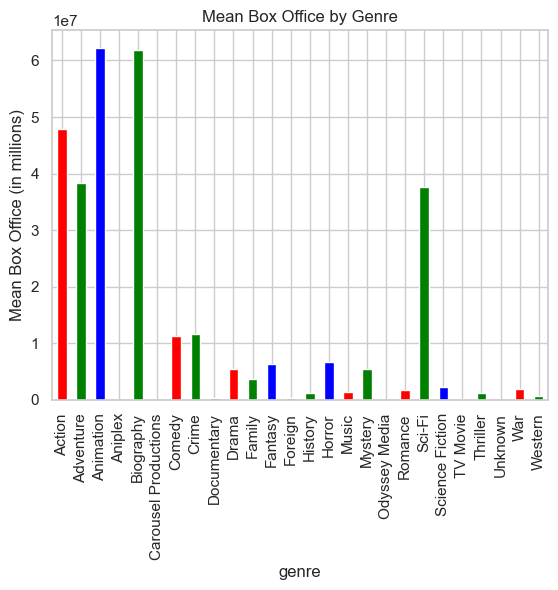

In [64]:
# plot the bar chart with each genre having its own color
colors = ['red', 'green', 'blue']
mean_box_office.plot(kind='bar', color=colors)

# add chart labels and title
plt.xlabel('genre')
plt.ylabel('Mean Box Office (in millions)')
plt.title('Mean Box Office by Genre')

# show the chart
plt.show()

Now we compare the mean box office in each deacade 

From 1960 to 2020

In [65]:
print(df_genre['year_only'].dtype)


object


# Genres profits distrbution 

In [66]:


# calculate mean profit for each genre
mean_profit = df_genre.groupby('genre')['profit'].mean().reset_index()
# print the result
print(mean_profit)

                   genre        profit
0                 Action  3.174019e+07
1              Adventure  2.447158e+07
2              Animation  4.441806e+07
3                Aniplex  0.000000e+00
4              Biography  3.627023e+07
5   Carousel Productions  0.000000e+00
6                 Comedy  6.900562e+06
7                  Crime  6.036351e+06
8            Documentary  2.307425e+05
9                  Drama  3.279226e+06
10                Family  2.639836e+06
11               Fantasy  3.275305e+06
12               Foreign  1.352848e+05
13               History -1.509888e+05
14                Horror  4.866317e+06
15                 Music  8.019000e+05
16               Mystery  3.638928e+06
17         Odyssey Media  0.000000e+00
18               Romance  9.770743e+05
19                Sci-Fi  1.319344e+07
20       Science Fiction  1.182718e+06
21              TV Movie -1.806849e+05
22              Thriller  1.648672e+05
23               Unknown -1.563379e+04
24                   War 

In [68]:
import plotly.express as px
# create bar chart with each genre a different color
fig = px.bar(mean_profit, x='genre', y='profit',
             color='genre', color_discrete_sequence=px.colors.qualitative.Pastel)

# update chart layout
fig.update_layout(title='Mean Profit by Genre', xaxis_title='Genre', yaxis_title='Mean Profit in billions')

# show the chart
fig.show()


In [69]:
top_genres = mean_profit.sort_values(by='profit', ascending=False).head(10)['genre'].tolist()


In [70]:
# Convert 'year_only' column to numeric type
df_genre['year_only'] = pd.to_numeric(df_genre['year_only'], errors='coerce')

# Extract the decade from the year
df_genre['decade'] = (df_genre['year_only'] // 10) * 10

# Calculate the mean profit by genre and decade
profit_by_decade = df_genre.groupby(['genre', 'decade'])['profit'].mean().reset_index()


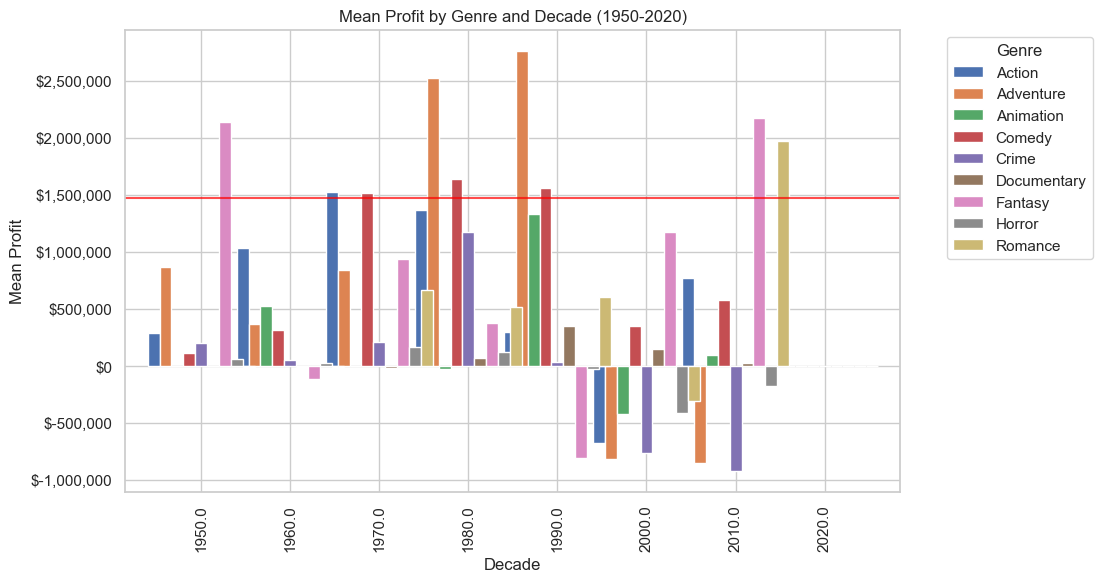

In [71]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Specify the list of genres
genres = ['Action', 'Adventure', 'Animation', 'Biography', 'Sci-Fi', 'Comedy', 'Crime', 'Documentary', 'Fantasy', 'Romance', 'Horror']

# Filter the data to include only the specified genres and from 1960 to 2020
filtered_data = df_genre[(df_genre['genre'].isin(genres)) & (df_genre['decade'] >= 1950) & (df_genre['decade'] <= 2020)]

# Group the data by decade and genre and calculate the mean profit
mean_profit = filtered_data.groupby(['decade', 'genre']).mean()['profit']

# Reshape the data to have decades as rows and genres as columns
mean_profit = mean_profit.unstack()

# Create a bar chart
ax = mean_profit.plot(kind='bar', figsize=(10, 6), width=1.2)

# Format y-axis labels as dollar signs
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Set the axis labels and title
ax.set_xlabel('Decade')
ax.set_ylabel('Mean Profit')
ax.set_title('Mean Profit by Genre and Decade (1950-2020)')

# # Add a horizontal line at 50% of the maximum value of the y-axis
max_y = ax.get_ylim()[1]
ax.axhline(y=max_y*0.5, color='red', alpha=0.7)

# Add legend outside the plot
ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


The graph shows the mean profit by genre and decade from 1950 to 2020. Each bar represents a genre, and the height of the bar indicates the average profit for that genre in a specific decade. The x-axis represents the decades, and the y-axis represents the mean profit.

The graph allows us to compare the profitability of different genres over time. We can observe which genres were more lucrative in specific decades and identify trends or shifts in profitability. The horizontal line at 50% of the maximum y-axis value provides a reference point for comparing the mean profit of each genre to a benchmark.

Additionally, the legend outside the plot provides a clear indication of the genre represented by each color. This allows for easy interpretation and understanding of the data presented.

In [72]:
mean_profit.describe

<bound method NDFrame.describe of genre         Action     Adventure     Animation        Comedy         Crime  \
decade                                                                         
1950.0  2.862212e+05  8.623651e+05  0.000000e+00  1.090091e+05  1.992596e+05   
1960.0  1.031353e+06  3.683885e+05  5.240876e+05  3.125191e+05  4.999370e+04   
1970.0  1.519314e+06  8.380304e+05 -5.555556e+03  1.510176e+06  2.058963e+05   
1980.0  1.368063e+06  2.519791e+06 -2.632621e+04  1.636520e+06  1.168745e+06   
1990.0  2.988921e+05  2.763407e+06  1.331628e+06  1.559160e+06  3.223340e+04   
2000.0 -6.798947e+05 -8.154160e+05 -4.225719e+05  3.454970e+05 -7.626028e+05   
2010.0  7.670883e+05 -8.515381e+05  9.519059e+04  5.788618e+05 -9.188762e+05   
2020.0  0.000000e+00           NaN           NaN           NaN           NaN   

genre     Documentary       Fantasy         Horror       Romance  
decade                                                            
1950.0    -130.000000  2.139524

# The number of movies in each genre every decade 

In [73]:
genres = ['Action', 'Adventure', 'Animation', 'Biography', 'Sci-Fi', 'Comedy', 'Crime', 'Documentary', 'Family', 'Fantasy', 'Romance', 'Western', 'War', 'Horror']

# Filter the data to include only the specified genres and from 1960 to 2020
filtered_data = df_genre[(df_genre['genre'].isin(genres)) & (df_genre['decade'] >= 1940) & (df_genre['decade'] <= 2020)]

# Group the data by decade and genre and get the count of movies
movie_count = filtered_data.groupby(['decade', 'genre']).count()['name']

# Print the movie count for each decade and genre
print(movie_count)

decade  genre      
1940.0  Action           85
        Adventure        40
        Animation        33
        Comedy          318
        Crime           127
        Documentary      21
        Family            8
        Fantasy          23
        Horror           27
        Romance          50
        War              40
        Western          40
1950.0  Action          163
        Adventure        97
        Animation        25
        Comedy          340
        Crime           164
        Documentary      30
        Family           12
        Fantasy          21
        Horror           75
        Romance          72
        War              45
        Western         108
1960.0  Action          241
        Adventure       125
        Animation        36
        Comedy          472
        Crime           100
        Documentary      76
        Family           17
        Fantasy          28
        Horror          140
        Romance          74
        War              50


In [74]:
import pandas as pd

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the movie_count DataFrame
print(movie_count)


decade  genre      
1940.0  Action           85
        Adventure        40
        Animation        33
        Comedy          318
        Crime           127
        Documentary      21
        Family            8
        Fantasy          23
        Horror           27
        Romance          50
        War              40
        Western          40
1950.0  Action          163
        Adventure        97
        Animation        25
        Comedy          340
        Crime           164
        Documentary      30
        Family           12
        Fantasy          21
        Horror           75
        Romance          72
        War              45
        Western         108
1960.0  Action          241
        Adventure       125
        Animation        36
        Comedy          472
        Crime           100
        Documentary      76
        Family           17
        Fantasy          28
        Horror          140
        Romance          74
        War              50


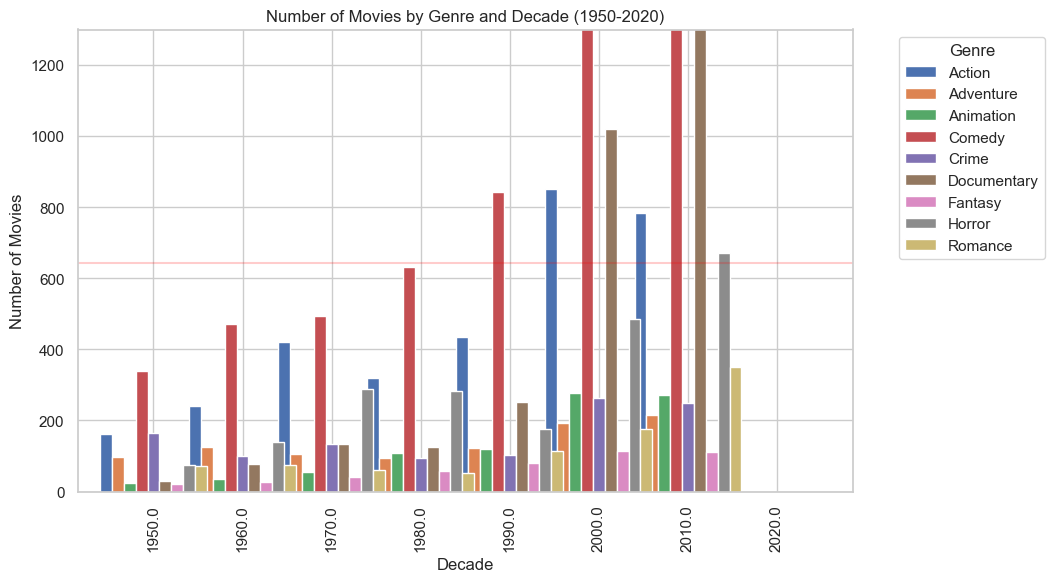

In [75]:
import matplotlib.pyplot as plt

# Specify the list of genres
genres = ['Action', 'Adventure', 'Animation', 'Biography', 'Sci-Fi', 'Comedy', 'Crime', 'Documentary',  'Fantasy', 'Romance',  'Horror']

# Filter the data to include only the specified genres and from 1960 to 2020
filtered_data = df_genre[(df_genre['genre'].isin(genres)) & (df_genre['decade'] >= 1950) & (df_genre['decade'] <= 2020)]

# Group the data by decade and genre and get the count of movies
movie_count = filtered_data.groupby(['decade', 'genre']).count()['name']

# Reshape the data to have decades as rows and genres as columns
movie_count = movie_count.unstack()

# Create a bar chart
ax = movie_count.plot(kind='bar', figsize=(10, 6), width=1.2)

# Set the axis labels and title
ax.set_xlabel('Decade')
ax.set_ylabel('Number of Movies')
ax.set_title('Number of Movies by Genre and Decade (1950-2020)')

# Add legend outside the plot
ax.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# # Add a horizontal line at 50% of the maximum value of the y-axis
max_y = ax.get_ylim()[1]
ax.axhline(y=max_y*0.5, color='red', alpha=0.2)

# Set the y-axis limit to 1300
ax.set_ylim([0, 1300])

# Show the plot
plt.show()


The graph shows the number of movies by genre and decade from 1950 to 2020. Each bar represents a genre, and the height of the bar represents the count of movies belonging to that genre in a specific decade. The x-axis represents the decades, and the y-axis represents the number of movies.

This graph allows us to compare the production volume of different genres over time. We can observe which genres had a higher or lower number of movies in specific decades and identify any trends or shifts in production patterns. The legend outside the plot helps identify each genre represented by its corresponding color.

Additionally, a horizontal line at 50% of the maximum y-axis value is included as a reference point for comparing the movie counts of each genre to a benchmark. The y-axis limit is set to 1300, providing a consistent scale for visual comparison.

# Descriptive statistics:

In [76]:
genre_stats = df_genre.groupby('genre')['Box_office'].describe()


In [77]:
genre_stats.head(60)

count          mean           std           min  \
genre                                                                     
Action                 4881.0  4.786687e+07  1.572587e+08 -2.147484e+09   
Adventure              1478.0  3.826695e+07  1.284488e+08  0.000000e+00   
Animation              1268.0  6.223631e+07  1.737269e+08  0.000000e+00   
Aniplex                   1.0  0.000000e+00           NaN  0.000000e+00   
Biography               308.0  6.176490e+07  9.132888e+07  4.636200e+04   
Carousel Productions      1.0  0.000000e+00           NaN  0.000000e+00   
Comedy                 9070.0  1.128747e+07  4.095707e+07  0.000000e+00   
Crime                  1771.0  1.164904e+07  4.595514e+07  0.000000e+00   
Documentary            3379.0  3.197535e+05  4.550972e+06  0.000000e+00   
Drama                 11327.0  5.349702e+06  3.767971e+07 -2.147484e+09   
Family                  454.0  3.716052e+06  3.889675e+07  0.000000e+00   
Fantasy                 565.0  6.390266e+06  3.092370e+07  0.000000e+00   
Foreign                 114.0  2.264897e+05  2.074572e+06  0.000000e+00   
History                 256.0  1.147766e+06  7.559389e+06  0.000000e+00   
Horror                 2476.0  6.743548e+06  3.282421e+07  0.000000e+00   
Music                   454.0  1.310783e+06  1.172999e+07  0.000000e+00   
Mystery                 488.0  5.358938e+06  4.260361e+07  0.000000e+00   
Odyssey Media             1.0  0.000000e+00           NaN  0.000000e+00   
Romance                1065.0  1.789267e+06  1.557784e+07  0.000000e+00   
Sci-Fi                    6.0  3.761010e+07  6.243180e+07  3.792188e+06   
Science Fiction         549.0  2.273013e+06  1.895432e+07  0.000000e+00   
TV Movie                365.0  1.150685e+05  2.198380e+06  0.000000e+00   
Thriller               1426.0  1.181318e+06  1.027755e+07  0.000000e+00   
Unknown                2392.0  2.819694e+04  6.914078e+05  0.000000e+00   
War                     350.0  1.840196e+06  1.039620e+07  0.000000e+00   
Western                 427.0  7.344225e+05  3.861760e+06  0.000000e+00   

                              25%         50%          75%           max  
genre                                                                     
Action                       0.00         0.0  16647800.00  2.069522e+09  
Adventure                    0.00         0.0   8927497.25  1.342322e+09  
Animation                    0.00         0.0   3996732.00  1.450027e+09  
Aniplex                      0.00         0.0         0.00  0.000000e+00  
Biography             10790852.75  33021960.0  67002684.25  9.119026e+08  
Carousel Productions         0.00         0.0         0.00  0.000000e+00  
Comedy                       0.00         0.0         0.00  6.112578e+08  
Crime                        0.00         0.0    861742.50  1.074427e+09  
Documentary                  0.00         0.0         0.00  1.273922e+08  
Drama                        0.00         0.0         0.00  7.231927e+08  
Family                       0.00         0.0         0.00  7.929106e+08  
Fantasy                      0.00         0.0         0.00  4.918685e+08  
Foreign                      0.00         0.0         0.00  2.200000e+07  
History                      0.00         0.0         0.00  1.023089e+08  
Horror                       0.00         0.0         0.00  7.017964e+08  
Music                        0.00         0.0         0.00  1.818138e+08  
Mystery                      0.00         0.0         0.00  7.600069e+08  
Odyssey Media                0.00         0.0         0.00  0.000000e+00  
Romance                      0.00         0.0         0.00  3.552983e+08  
Sci-Fi                 4357238.25   7974206.5  32682783.50  1.618495e+08  
Science Fiction              0.00         0.0         0.00  3.037886e+08  
TV Movie                     0.00         0.0         0.00  4.200000e+07  
Thriller                     0.00         0.0         0.00  2.665868e+08  
Unknown                      0.00         0.0   

The table shows the statistical analysis of different movie genres based on several parameters such as count, mean, standard deviation, minimum, maximum, and percentiles. The count parameter shows the number of movies in each genre, and the mean parameter represents the average value of a parameter, such as revenue, for each movie in the genre. The standard deviation parameter shows the deviation of each movie's value from the mean value. The minimum and maximum parameters represent the lowest and highest value of a parameter for each movie in the genre.

The analysis shows that the Action genre has the highest count of movies (4881) and the highest mean revenue per movie (47.87 million), but it also has a high standard deviation (157.26 million), indicating a wide range of revenue values among its movies. The Adventure and Animation genres have a lower count of movies (1478 and 1268 respectively) but similar mean revenues per movie (38.27 million and 62.24 million respectively). However, the Adventure genre has a wider range of revenue values, as shown by its higher maximum value (1.34 billion) compared to the Animation genre's maximum value (1.45 billion).

The analysis also shows that some genres have very few movies, such as Aniplex, Carousel Productions, and Sci-Fi, which may affect the statistical accuracy of their analysis. Additionally, some genres such as Documentary and TV Movie have very low mean revenue per movie, indicating lower popularity among moviegoers. Overall, the statistical analysis provides insights into the revenue trends of different movie genres, helping filmmakers and investors make informed decisions about movie production and investment strategies.

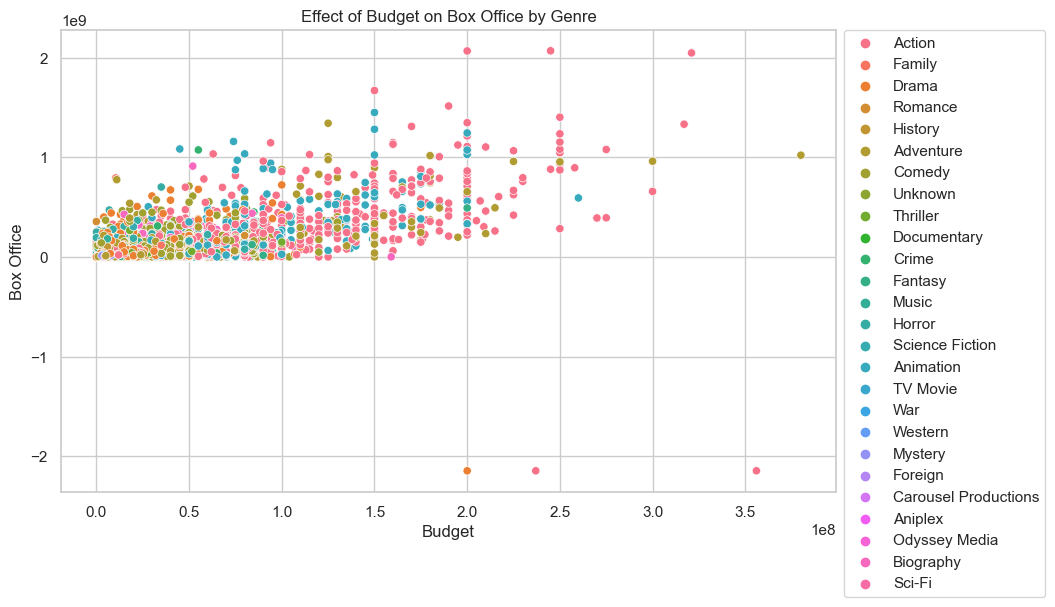

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10,6))

# Scatter plot with hue for genre
sns.scatterplot(x='budget', y='Box_office', hue='genre', data=df_genre)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

# Set the labels and title
plt.xlabel('Budget')
plt.ylabel('Box Office')
plt.title('Effect of Budget on Box Office by Genre')

plt.show()



# hypothesis tests

determine whether there is a statistically significant difference in box office revenue between genres, we can use an Analysis of Variance (ANOVA) test.

In [79]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
model = ols('Box_office ~ C(genre)', data=df_genre).fit()

# Perform the ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)


                sum_sq       df           F  PR(>F)
C(genre)  1.318695e+19     25.0  104.447948     0.0
Residual  2.264791e+20  44846.0         NaN     NaN


he output is from an analysis of variance (ANOVA) test, which tests for a significant difference in means between groups. In this case, the test is examining whether there is a significant difference in box office revenue between the different movie genres. The table shows the sum of squares (SS), degrees of freedom (df), F-value, and p-value (PR) of the model. The sum of squares measures the variation between the groups and the residual, which is the variation within the groups. The F-value represents the ratio of the variation between the groups to the variation within the groups. The p-value indicates the probability of observing the F-value by chance alone. In this case, the p-value is less than 0.05, which means that there is a significant difference in box office revenue between genres.

# regression model

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the formula for the regression model
formula = 'Box_office ~ C(genre)'

# Fit the model using the formula
model = ols(formula=formula, data=df_genre).fit()

# Print the summary statistics for the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Box_office   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     104.4
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        21:51:18   Log-Likelihood:            -8.7490e+05
No. Observations:               44872   AIC:                         1.750e+06
Df Residuals:                   44846   BIC:                         1.750e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

The model includes 25 dummy variables for the different genres, and the intercept. The coefficients for the dummy variables represent the difference between each genre and the baseline category. The baseline category is not included in the model, and the coefficients for all other categories are relative to it. In this case, the baseline category is not mentioned.

The R-squared value of the model is 0.055, indicating that only 5.5% of the variation in box office can be explained by the independent variable. This value is relatively low, suggesting that other factors are likely to be significant contributors to box office success.

The F-statistic is 104.4, with a corresponding p-value of 0.00. This indicates that the model is statistically significant, and the independent variable is a significant predictor of box office.

The p-values for all the genre coefficients are less than 0.05, which means they are statistically significant. The negative coefficients for some genres indicate that they have a negative impact on box office, while positive coefficients indicate a positive impact. For example, the genre Animation has a coefficient of 1.437e+07, indicating that movies in this genre have a positive impact on box office.

In conclusion, the model suggests that genre is a statistically significant predictor of box office, but it only explains a small portion of the variation in box office. Other factors, such as marketing, cast, and release date, may have a more significant impact on box office success.